### File Information(Used Automobile Dataset):
- File Name:- automobile data.csv
- Source:- Kaggle
- Filesize:- 17.21 KB

### Dataset Description :
- The Automobile dataset is suitable for analyzing factors influencing the selling price of automobiles in the secondary market. It allows exploration of how features such as the manufacturing year, kilometers driven, and fuel type affect the resale value. Additionally, insights into the distribution of sellers, types of transmissions, and ownership history can be derived.
- Dataset Dimensions:- 301 rows x 9 columns.

### Feature Description :
- Auto_Name:- Name/model of the automobile.
- Year:- Year the automobile was bought.
- Selling_Price:- Selling price(in Lakhs) of the automobile as marked by the seller.
- Present_Price:- Current ex-showroom price(in Lakhs) of the automobile.
- Driven_kms:- Distance travelled by the automobile in Kilometers.
- Fuel_Type:- Type of Fuel used by the automobile - Petrol, Diesel or CNG.
- Selling_type:- Seller Type - Dealer or Individual.
- Transmission:- Type of Transmission of the automobile - Manual or Automatic.
- Owner:- Number of previous owners.

### Work Info:
- Programming Language used:- Python.
- Platform:- Jupyter Notebook.
- Libraries used:- Pandas, Matplotlib, Seaborn, Sklearn.
- Machine Learning Algorithm(s) employed:- Linear Regression, SVM, Decision Tree, Random Forest. 

In [1]:
#Importing all the required libraries need for analysis of the dataset
import pandas as pd #Data manipulation and analysis
import matplotlib.pyplot as plt #Visualization analysis
import seaborn as sns #Visualization analysis
from sklearn.model_selection import train_test_split #For splitting train and test data
from sklearn.linear_model import LinearRegression #Model training and prediction
from sklearn.svm import SVR #Model training and prediction
from sklearn.tree import DecisionTreeRegressor #Model training and prediction
from sklearn.ensemble import RandomForestRegressor #Model training and prediction
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error #Determining accuracy and error for each model
from datetime import datetime #To determine current year 

### Data Collection :

In [2]:
#Loading the dataset "car data.csv" into a pandas dataframe "raw_car" and then displaying the same
raw_autmob = pd.read_csv('automobile data.csv')
raw_autmob

,Auto_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988.0,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000.0,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934.0,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000.0,Diesel,Dealer,Manual,0


### Dataset Overview :

In [3]:
#To determine the shape of the dataframe i.e. the number or rows/records x the number of columns/features 
raw_autmob.shape

(301, 9)

*This dataset contains 301 rows and 9 columns*

In [4]:
#Displaying 8 random records of the dataframe
raw_autmob.sample(8)

,Auto_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
51,fortuner,2015,23.00,30.61,40000.0,Diesel,Dealer,Automatic,0
32,swift,2014,4.95,7.49,39000.0,Diesel,Dealer,Manual,0
125,Royal Enfield Classic 500,2009,0.90,1.75,40000.0,Petrol,Individual,Manual,0
246,i20,2012,3.75,6.79,35000.0,Petrol,Dealer,Manual,0
202,grand i10,2015,4.40,5.70,28200.0,Petrol,Dealer,Manual,0
47,wagon r,2006,1.05,4.15,65000.0,Petrol,Dealer,Manual,0
85,camry,2006,2.50,23.73,142000.0,Petrol,Individual,Automatic,3
62,fortuner,2014,18.75,35.96,78000.0,Diesel,Dealer,Automatic,0


In [5]:
#To display basic information about the dataframe(Null values and data types)
raw_autmob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Auto_Name      300 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     295 non-null    float64
 5   Fuel_Type      298 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   300 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 21.3+ KB


**As we can infer from the above information, the dataframe contains :**
>- 1 Null value in "Auto_Name"<br>
>- 1 Null value in "Kms_Driven"<br>
>- 3 Null values in "Fuel Type"<br>
>- 1 Null value in "Transmission"<br>
>- "Auto_Name", "Fuel_Type", "Seller_Type", "Transmission" and "Owner" are object types<br>
>- "Year", "Selling_Price", "Present_Price" and "Kms_Driven" are either integer or floating-point type

In [6]:
#To determine the summary statistics of the numerical columns
raw_autmob[['Selling_Price','Present_Price','Kms_Driven']].describe()

,Selling_Price,Present_Price,Kms_Driven
count,301.000000,301.000000,295.000000
mean,4.661296,7.628472,36589.027119
std,5.082812,8.644115,39041.638886
min,0.100000,0.320000,500.000000
25%,0.900000,1.200000,15000.000000
50%,3.600000,6.400000,31604.000000
75%,6.000000,9.900000,47000.000000
max,35.000000,92.600000,500000.000000


*Only 'Selling_Price','Present_Price' and 'Kms_Driven' are selected because they contain quantitative, continuous elements where as "Year" and "Owner" have discrete elements*

**Observation :**
>- Mean of each numerical column is mostly close to its 50th percentile<br>
>- Standard deviation of "Selling_Price" and "Present_Price" are significantly small as compared to the "Km_Driven"

### Data Preprocessing :

In [7]:
#To display the count of the number of unique categories in each feature.
raw_autmob.nunique()

Auto_Name         97
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       201
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

**Conclusion :**
>- There are 97 unique automobiles<br>
>- 3 types of fuel<br>
>- 2 types of seller<br>
>- 2 types of Transmissions

In [8]:
#Storing the numerical and categorical columns names into 2 variables
int_columns = raw_autmob.select_dtypes(include=['number']).columns
cat_columns = raw_autmob.select_dtypes(include=['object']).columns
print(f"{int_columns}\n{cat_columns}")

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')
Index(['Auto_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')


In [9]:
#To find out the count of all the unique values of each category
#Year and Owner although numerical, are included because they are discrete in nature
for i in cat_columns[1:]: #list slicing from 1 to end for taking all the Columns excluding "Auto_Name"
    print(f"{raw_autmob[i].value_counts()}\n")
for i in int_columns[::4]: #list slicing from 0 to end with 4 steps for only taking the "Year" and "Owner" Column 
    print(f"{raw_autmob[i].value_counts()}\n")

Fuel_Type
Petrol    236
Diesel     60
CNG         2
Name: count, dtype: int64

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

Transmission
Manual       260
Automatic     40
Name: count, dtype: int64

Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64

Owner
0    290
1     10
3      1
Name: count, dtype: int64



#### Feature Engineering :

In [10]:
#To have the "Year" feature have an impact on our analysis we use it to introduce a new feature into the dataframe as "Auto_Age" defining the age of the car.
#We assume that the minimum age of an automobile to be 1.
automob = raw_autmob.copy() # we use copy() so that modifying autmob do not reflect in the original dataframe raw_autmob.
present_year = raw_autmob["Year"].max() + 1
automob["Car_Age"] = present_year - raw_autmob["Year"]
automob.head()

,Auto_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0,5
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0,6
2,ciaz,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0,2
3,wagon r,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual,0,8
4,swift,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0,5


In [11]:
#Since Auto_Name contains 97 unique categories which is very high compared to the number of dataframe elements, we drop it.
#Since we have already calculated the Age of the automobiles we drop the "Year" column as well.
automob.drop(["Auto_Name","Year"], axis = 1, inplace = True)
automob.head(2)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0,5
1,4.75,9.54,43000.0,Diesel,Dealer,Manual,0,6


#### Duplicates Detection & Removal :

In [12]:
#To check for the number of duplicate records
automob.duplicated().sum()

2

*There are 2 duplicate records*

In [13]:
#To drop the duplicates
automob = automob.drop_duplicates()
automob.shape

(299, 8)

*2 records has been deleted*

#### Outlier Detection & Removal :

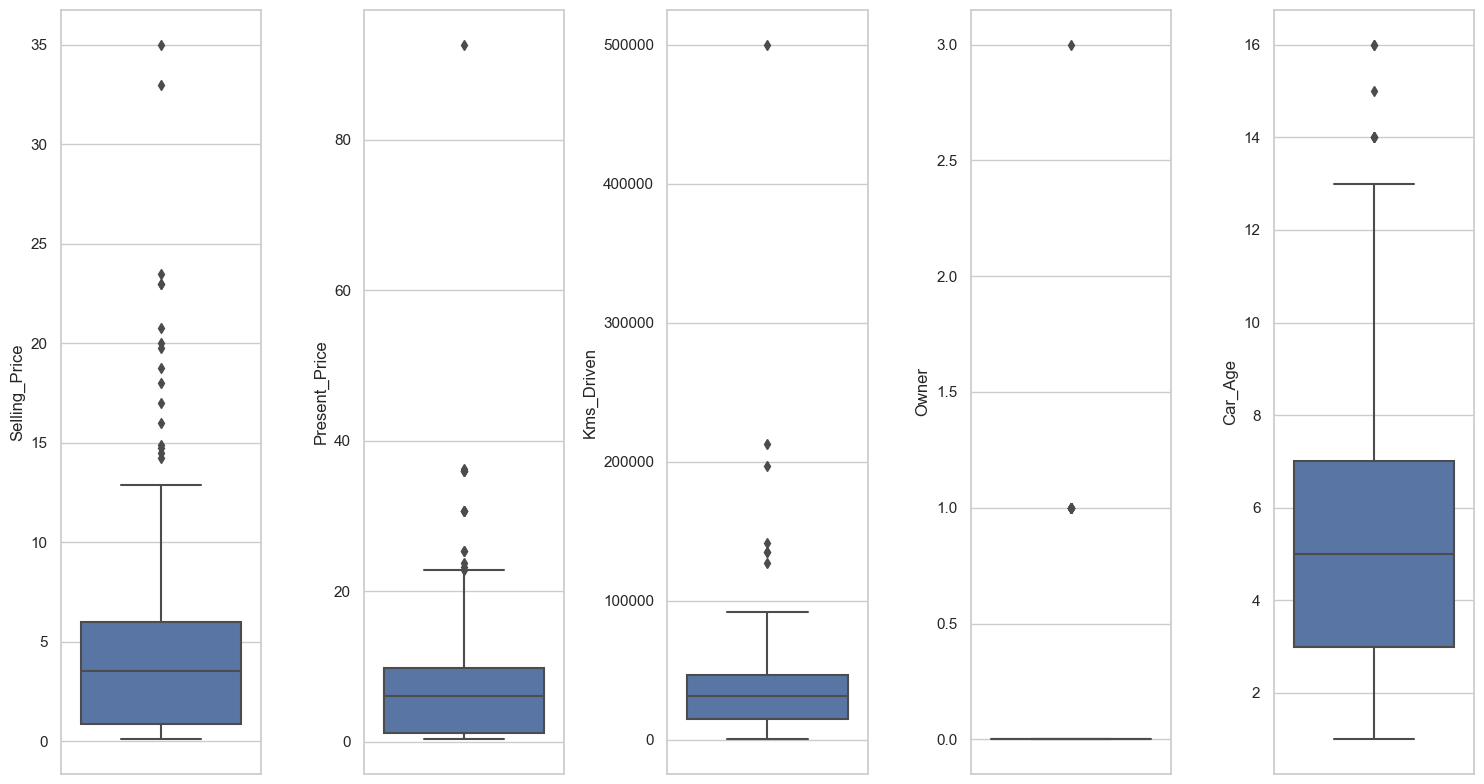

In [14]:
#To determine the outliers present in each numerical column 
newint_columns = automob.select_dtypes(include=['number']).columns #To store the numerical features of the modified dataframe
sns.set(style="whitegrid") #To help determine the almost exact positions of the outliers
plt.figure(figsize=(15, 8)) #To fix the shape of the canvas the boxplot is to be mapped
for i, column in enumerate(newint_columns): #enumerate returns an iterable along with the index(assigned to variable i)
    plt.subplot(1, len(newint_columns), i + 1) #no of rows, no of cols, index position
    sns.boxplot(y=automob[column]) #plotting a boxplot in each index for a particular column
plt.tight_layout() #To ensure the subplots dont overlap each other
plt.show()

**Observation :**
>- "Selling_Price" has most of the data within 0 - 13 and some lie beyond and as high as 35 which are to be considered as outliers.<br>
>- "Present_Price" has most of the data within 0 - 23 and very few lie beyond and as high as 95 which are to be considered as outliers.<br>
>- "Kms_Driven" has most of the data within 0 - 100000 and few lie beyond and as high as 500000 which are to be considered as outliers.<br>
>- "Owner" has most of the data as 0 and very few lie in 1 and 3 which are to be considered as outliers.<br>
>- "Car_Age" has most of the data with 1 - 13 and few lie beyond and as high as 16 which are to be considered as outliers.

*We decide to keep the outliers of all the features except for the Kms_Driven which has extremely high range of outliers*<br>
*As even outliers may contain useful data for analysis*

In [15]:
#Removing the outliers of "Kms_Driven" using IQR method
Q1 = automob['Kms_Driven'].quantile(0.25) #First Quartile
Q3 = automob['Kms_Driven'].quantile(0.75) #Third Quartile
IQR = Q3 - Q1 #Inter Quartile Range
#Data filtering based on the IQR range 
automob = automob[(automob['Kms_Driven'] >= (Q1-1.5*IQR)) & (automob['Kms_Driven'] <= (Q3+1.5*IQR))]
automob.shape

(286, 8)

*Since only 13 outliers are to be removed from the column the 13 entire records has been removed*

#### Missing Value Detection & Imputation :

In [16]:
#Checking for missing values after 13 record were removed
automob.isna().sum()

Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        3
Seller_Type      0
Transmission     1
Owner            0
Car_Age          0
dtype: int64

*Only "Fuel_Type" and "Transmission" has missing values*

In [17]:
#Imputting missing values for "Fuel_Type" and "Transmission"
fuel_mode = automob['Fuel_Type'].mode().iloc[0] #Indexing is required because mode() returns a pandas series as there can be more than 1 mode
tra_mode = automob['Transmission'].mode().iloc[0]
automob['Fuel_Type'].fillna(fuel_mode , inplace = True) #replacing NAN values with the most occuring value(mode)
automob['Transmission'].fillna(tra_mode , inplace = True)
automob[['Fuel_Type', 'Transmission']].isna().sum()

Fuel_Type       0
Transmission    0
dtype: int64

*All the missing values have been imputed correctly*

### Exploratory Data Analysis :

#### Univariate Analysis :

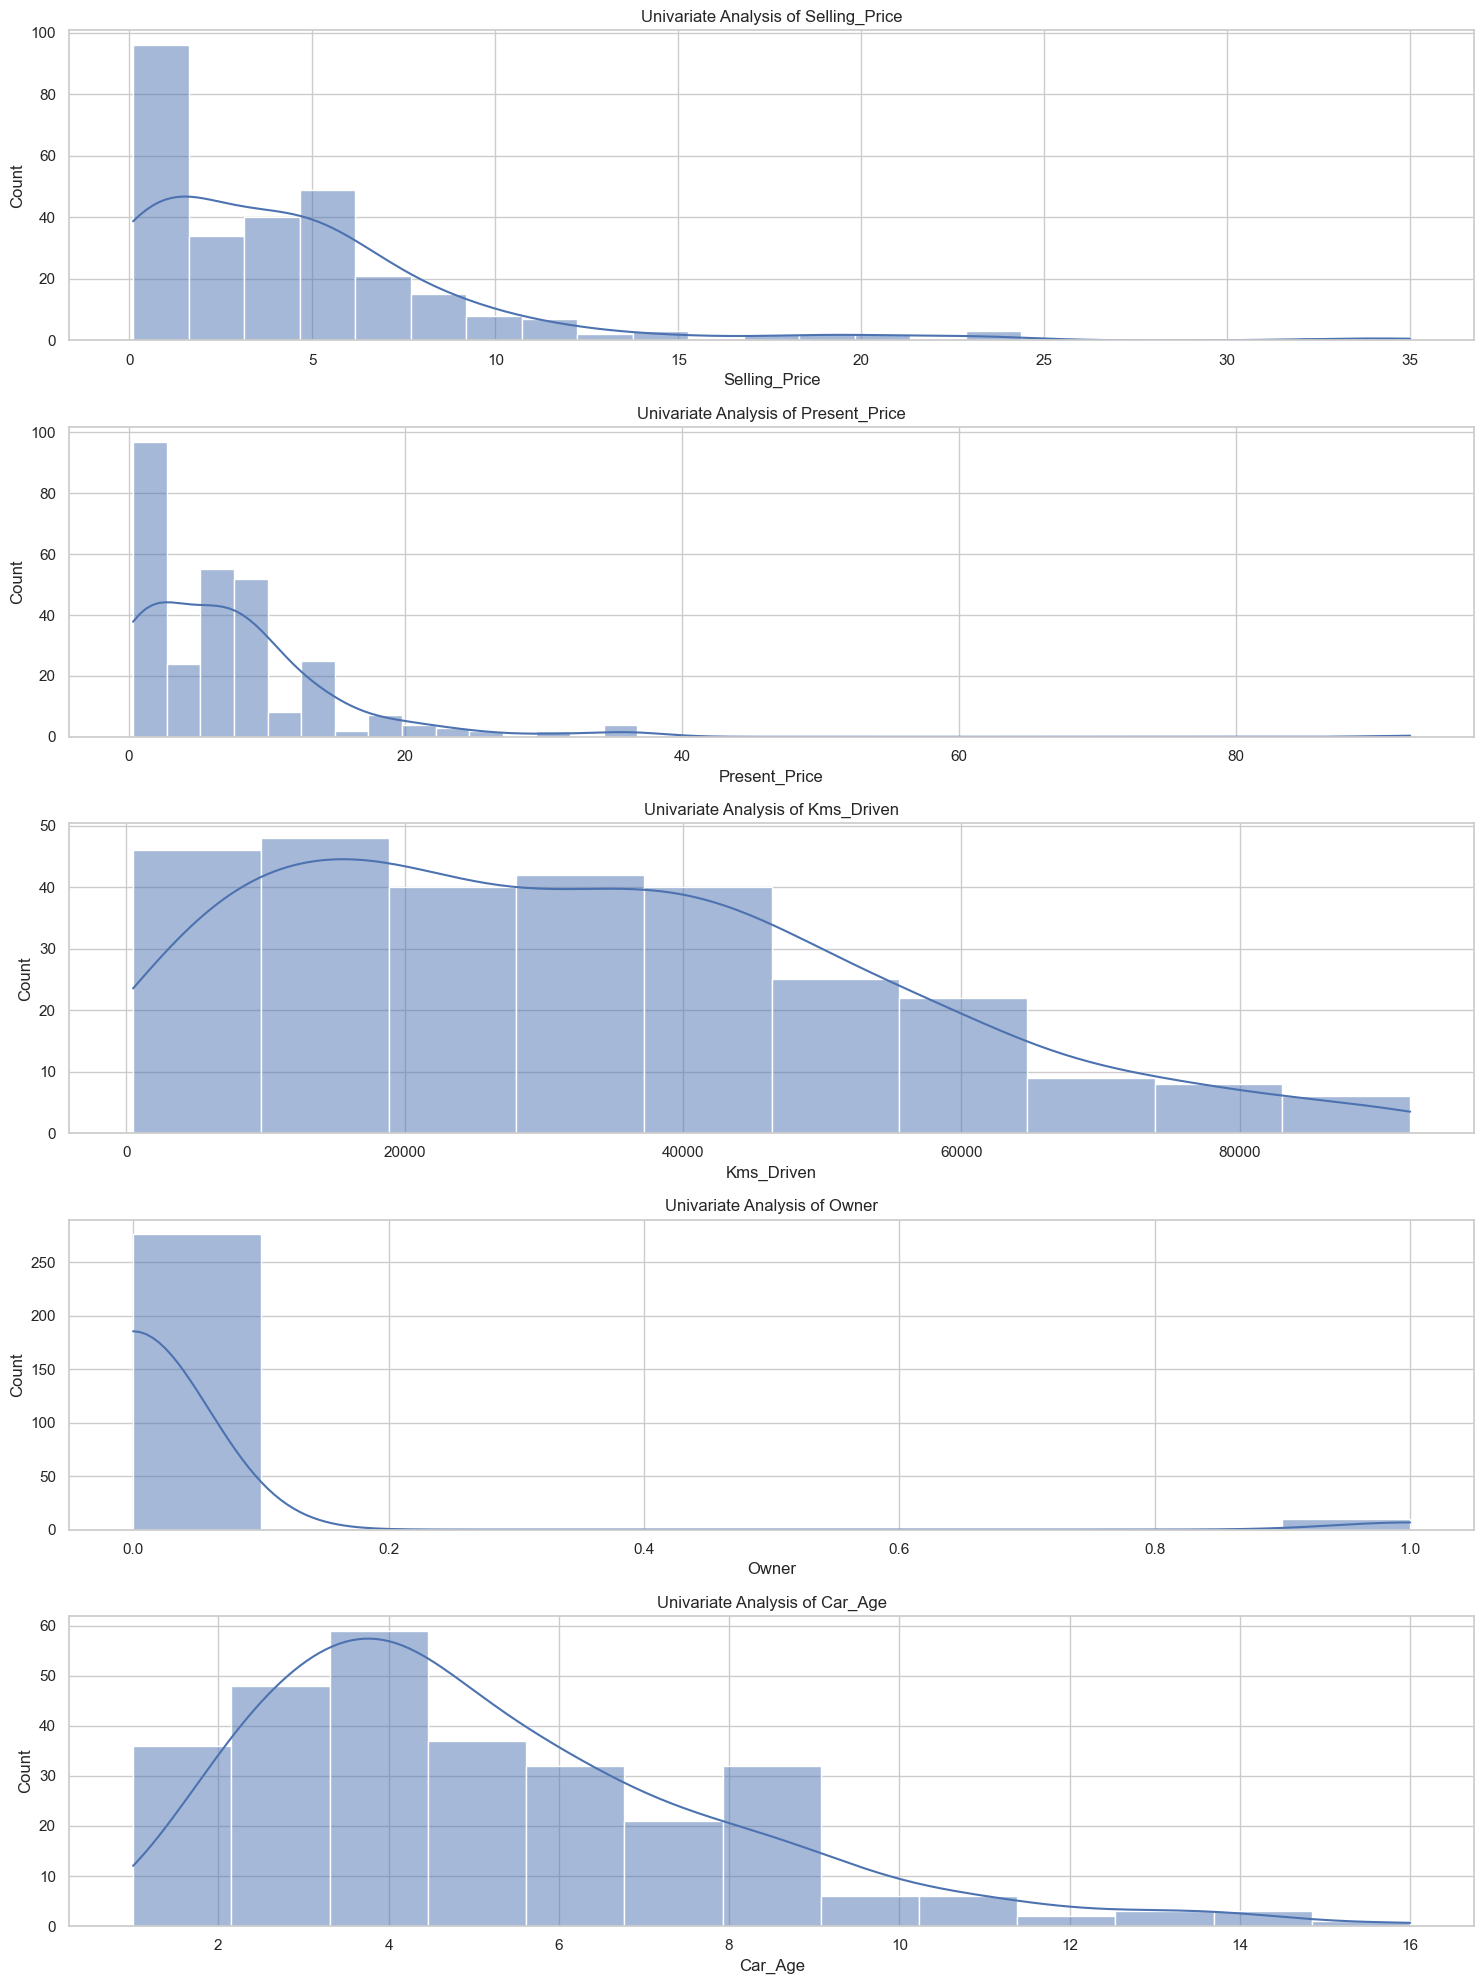

In [18]:
#Numerical Features
#To find out the range/frequency of the numerical features 
int_cols = automob.select_dtypes(include=['number']).columns #To store the numerical features names
plt.figure(figsize=(15, 20)) #To fix the shape of the canvas the boxplot is to be mapped
for i, feature in enumerate(int_cols): #enumerate returns an iterable along with the index(assigned to variable i)
    plt.subplot(len(int_cols), 1, i + 1) #no of rows, no of cols, index position
    sns.histplot(automob[feature],kde = True) #plotting a histogram in each index for a particular feature
    plt.title(f'Univariate Analysis of {feature}')
plt.tight_layout() #To ensure the subplots dont overlap each other
plt.show()

**Observation :**
- *All the numerical variables are right skewed*<br>
- *Most of the Selling_Price ranges between 0 - 15 Lakhs*<br>
- *Most of the Present_Price ranges between 0 - 20 Lakhs*<br>
- *Most of the Kms_Driven ranges between 0 - 60000 kms*<br>
- *Most of the Owner ranges in 0*<br>
- *Most of the Car_Age ranges between 1 - 9 years*<br>

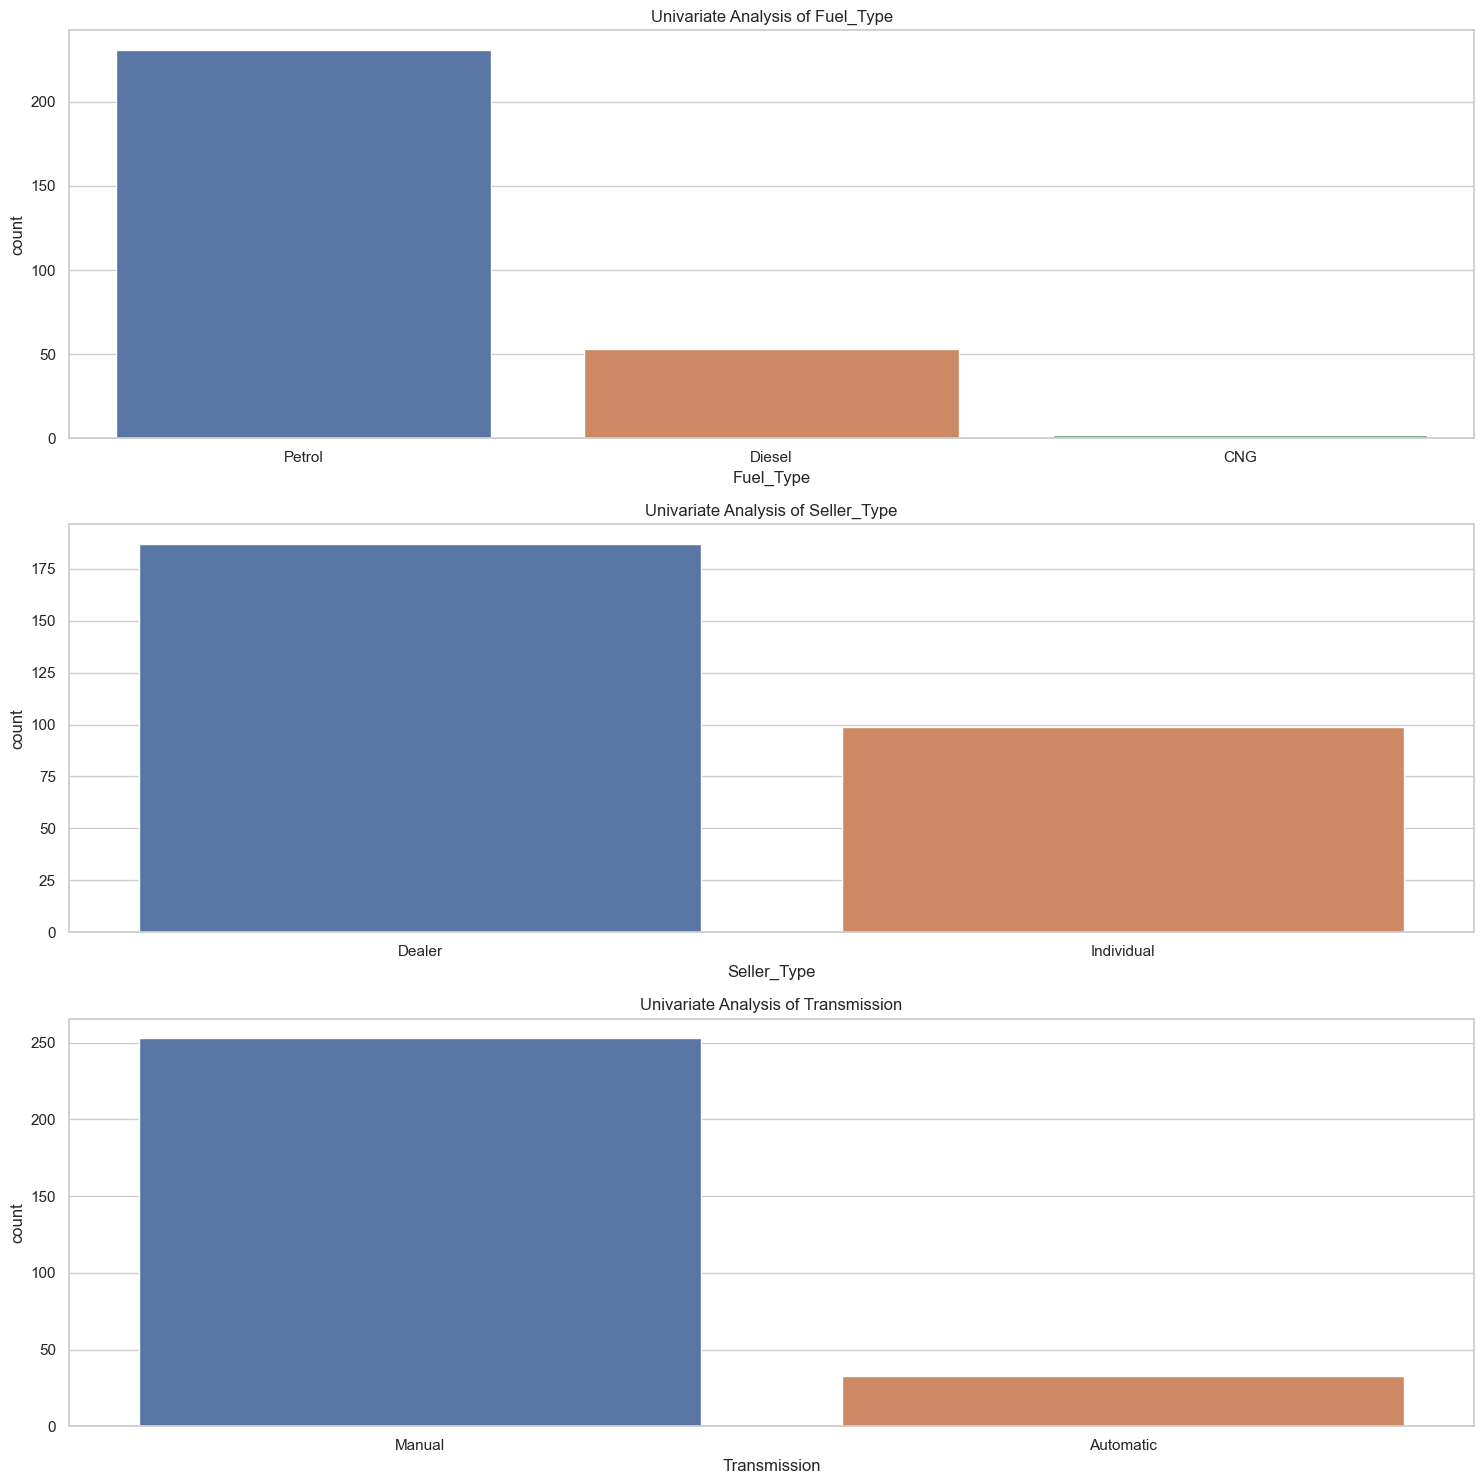

In [19]:
#Categorical Features
#To find out the frequency of the categorical features
cat_cols = automob.select_dtypes(include=['object']).columns #To store the categorical features names
plt.figure(figsize=(15, 15)) #To fix the shape of the canvas the boxplot is to be mapped
for i, feature in enumerate(cat_cols): #enumerate returns an iterable along with the index(assigned to variable i)
    plt.subplot(len(cat_cols), 1, i + 1) #no of rows, no of cols, index position
    sns.countplot(x=feature, data=automob) #plotting a barplot in each index for a particular feature
    plt.title(f'Univariate Analysis of {feature}')
plt.tight_layout() #To ensure the subplots dont overlap each other
plt.show()

**Observation :**
- *Fuel_Type has 3 categories with Petrol having the highest frequency and CNG having the least frequency.*<br>
- *Seller_Type has 2 categories with Dealer having the highest frequency and Individual having the least frequency*<br>
- *Transmission has 2 categories with Manual having the highest frequency and Automatic having the least frequency.*

#### Bivariate Analysis :

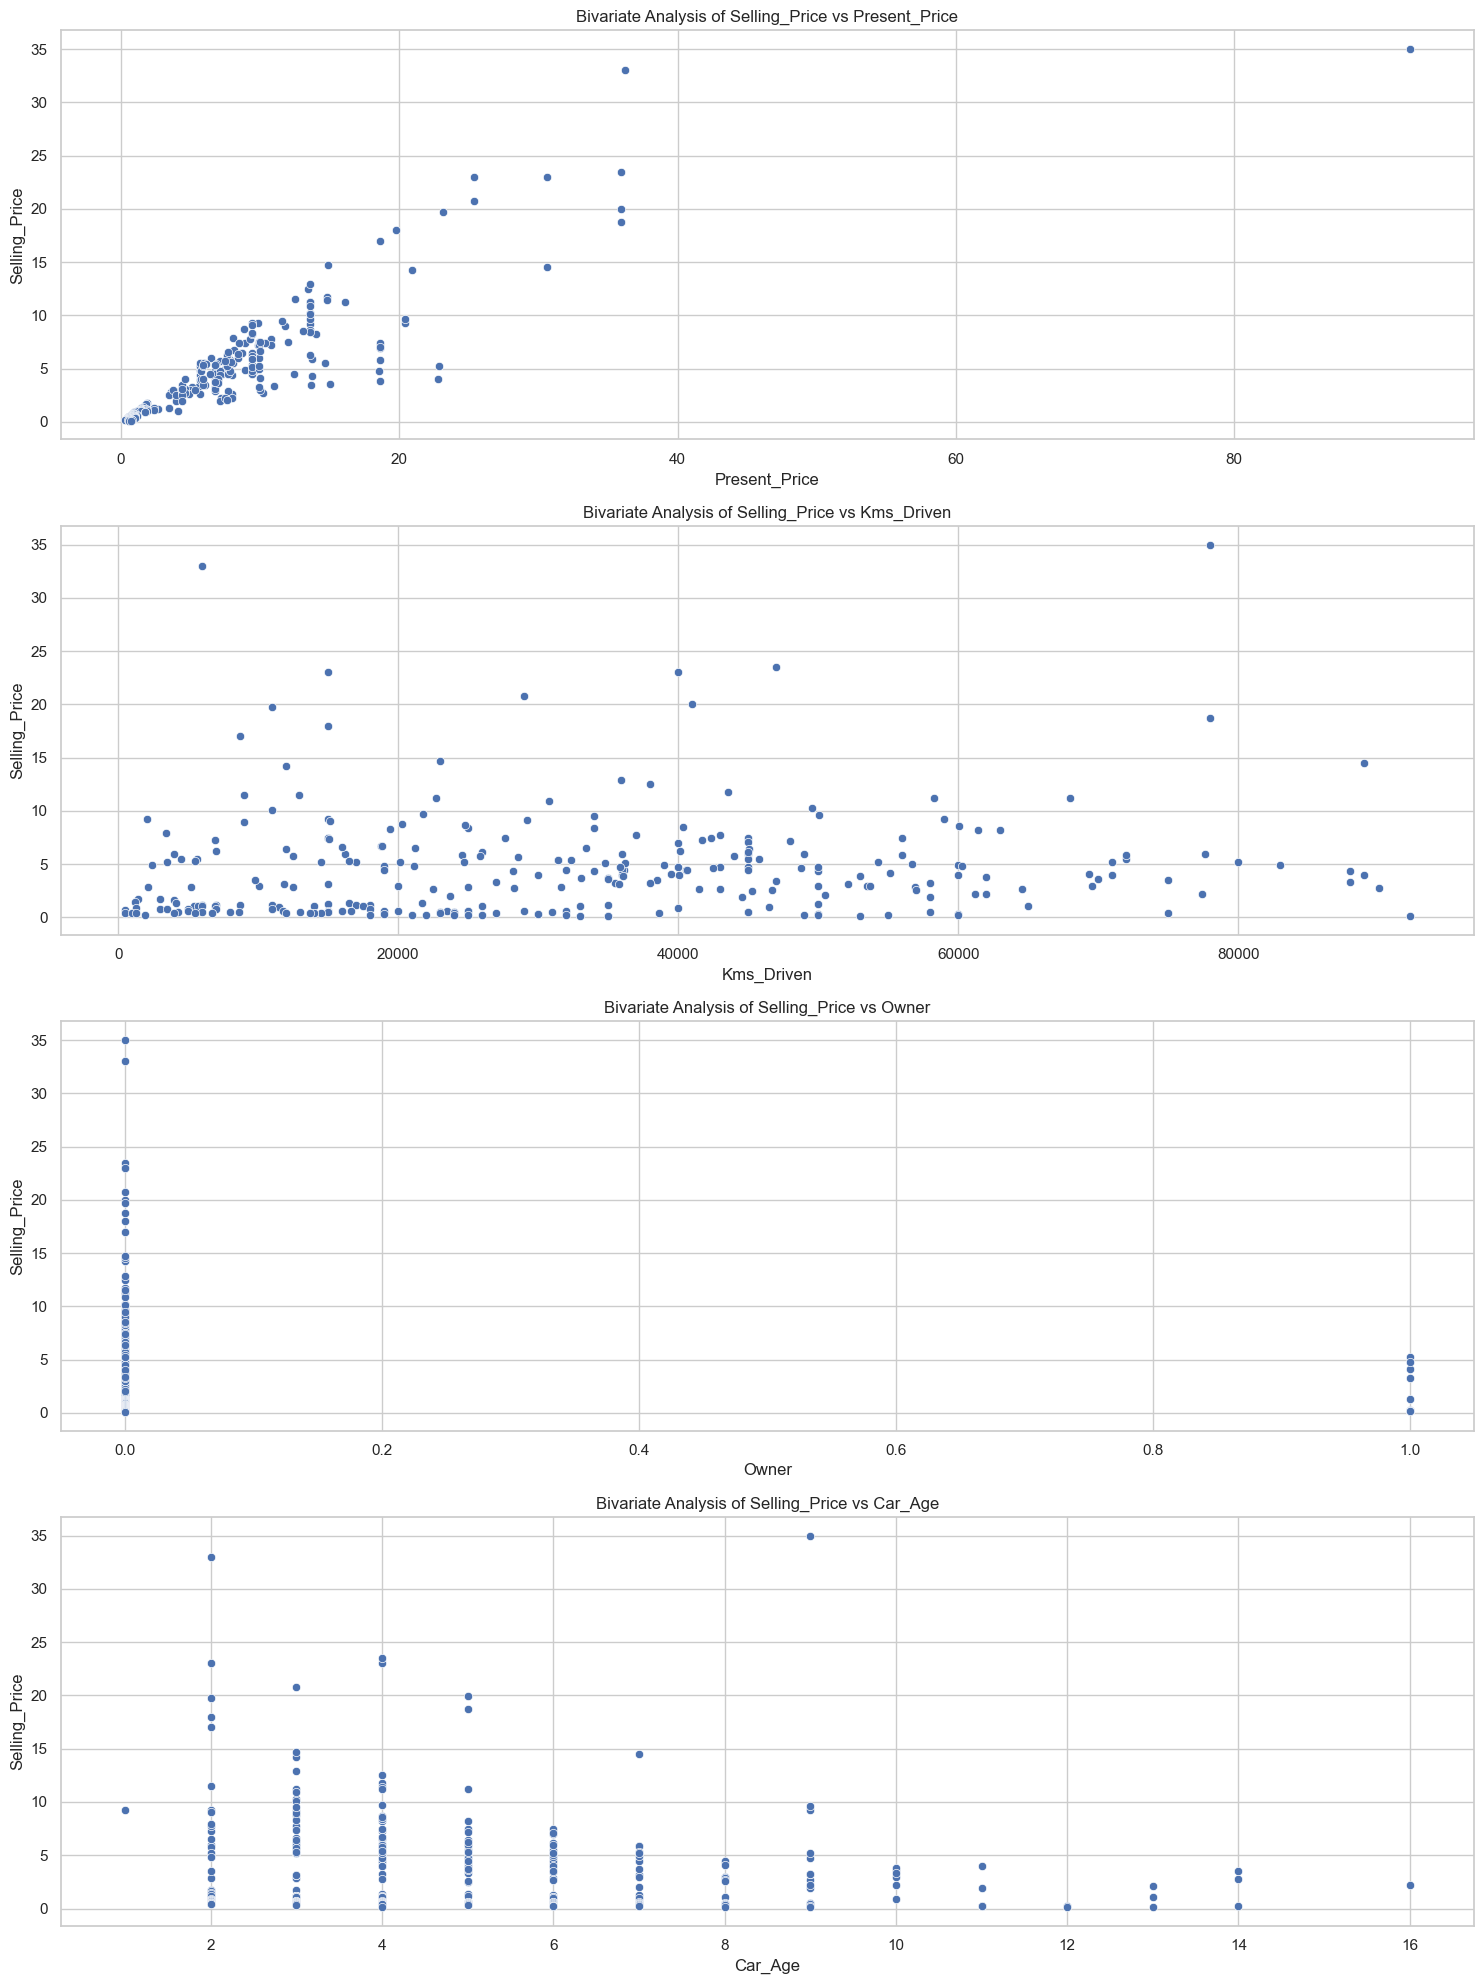

In [20]:
#Selling_Price vs all the Numerical Features to determine how much selling price changes in response to changes in adjacent features
int_cols = int_cols.drop("Selling_Price") #Dropping the "Selling_Price" feature
plt.figure(figsize = (15, 20)) #To fix the shape of the canvas the boxplot is to be mapped
for i, feature in enumerate(int_cols): #enumerate returns an iterable along with the index(assigned to variable i)
    plt.subplot(len(int_cols), 1, i + 1) #no of rows, no of cols, index position
    sns.scatterplot(x = feature, y = 'Selling_Price', data = automob) #plotting a scatter plot in each index for a particular feature
    plt.title(f'Bivariate Analysis of Selling_Price vs {feature}') #To set the title of each scatterplot
plt.tight_layout() #To ensure the subplots dont overlap each other
plt.show()

**Observation :**
- *Selling_Price is directly proportional to the Present_Price suggesting a consistent relationship.*<br>
- *Kms_Driven has minute but noticeable affect in the Selling_Price, less driven automobiles have relatively more selling price.*<br>
- *Selling_Price is inversely proportional to Owner, automobiles having 0 owners have much more selling price.*<br>
- *Selling_Price is inversely proportional to Car_Age, automobiles which are comparatively new have more selling price.*

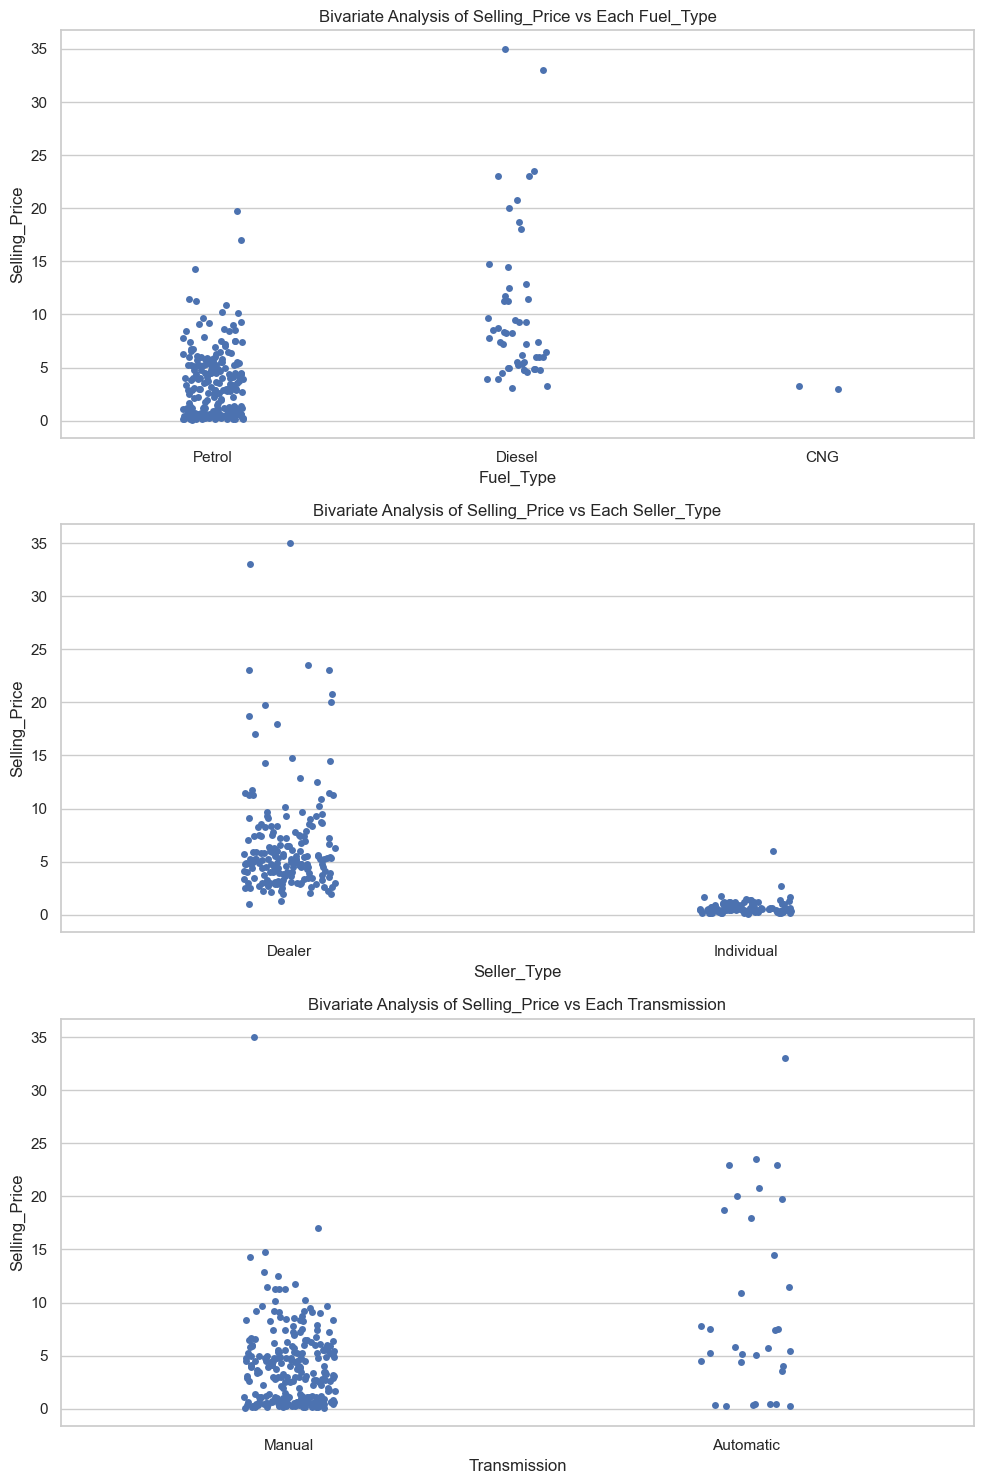

In [21]:
#Selling_Price vs all the Categorical Features to determine how much selling price changes in response to changes in adjacent features
plt.figure(figsize = (10, 15)) #To fix the shape of the canvas the boxplot is to be mapped
for i, feature in enumerate(cat_cols): #enumerate returns an iterable along with the index(assigned to variable i)
    plt.subplot(len(cat_cols), 1, i + 1) #no of rows, no of cols, index position
    sns.stripplot(x = feature, y = 'Selling_Price', data = automob) #plotting a scatter plot in each index for a particular feature
    plt.title(f'Bivariate Analysis of Selling_Price vs Each {feature}') #To set the title of each stripplot
plt.tight_layout() #To ensure the subplots dont overlap each other
plt.show()

**Observation :**
- *Diesel Types automobiles have the highest selling price followed by CNG with petrol type having the least selling price.*<br>
- *The Selling price of automobiles sold by dealers are much more than that of indivuduals.*<br>
- *Automatic automobiles have higher selling price than manual ones*

#### Multivariate Analysis :

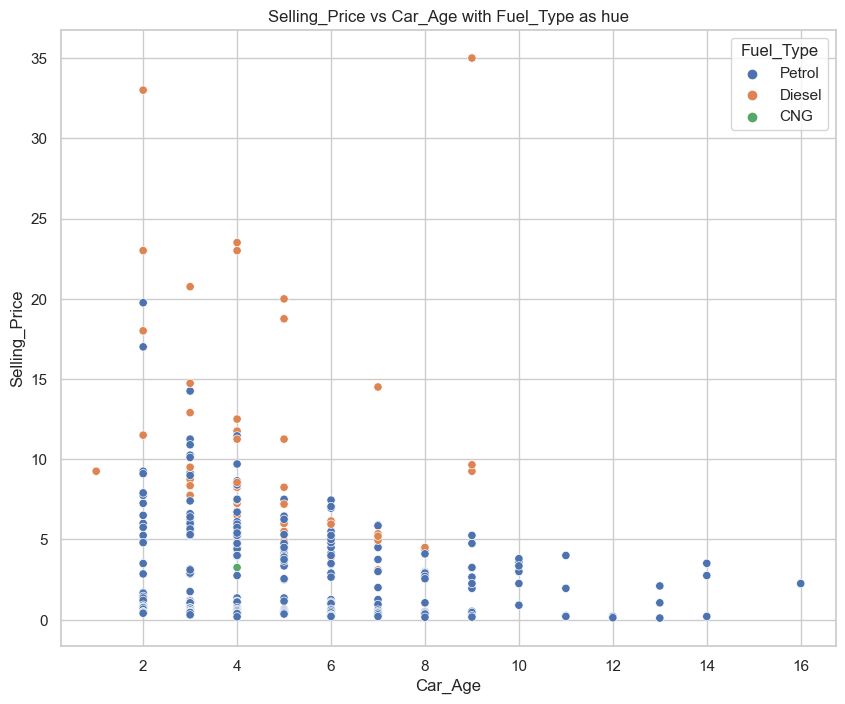

In [22]:
#Multivariate Analysis using Scatter Plot to determine how much selling price changes in response to changes in car manufacture date(age) and fuel type
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'Car_Age', y = 'Selling_Price', data = automob, hue = 'Fuel_Type')
plt.title("Selling_Price vs Car_Age with Fuel_Type as hue")
plt.show()

**Observation :**
- *Automobiles of Diesel & CNG Type are comparatively newer and have higher selling price as when compared to Petrol* 

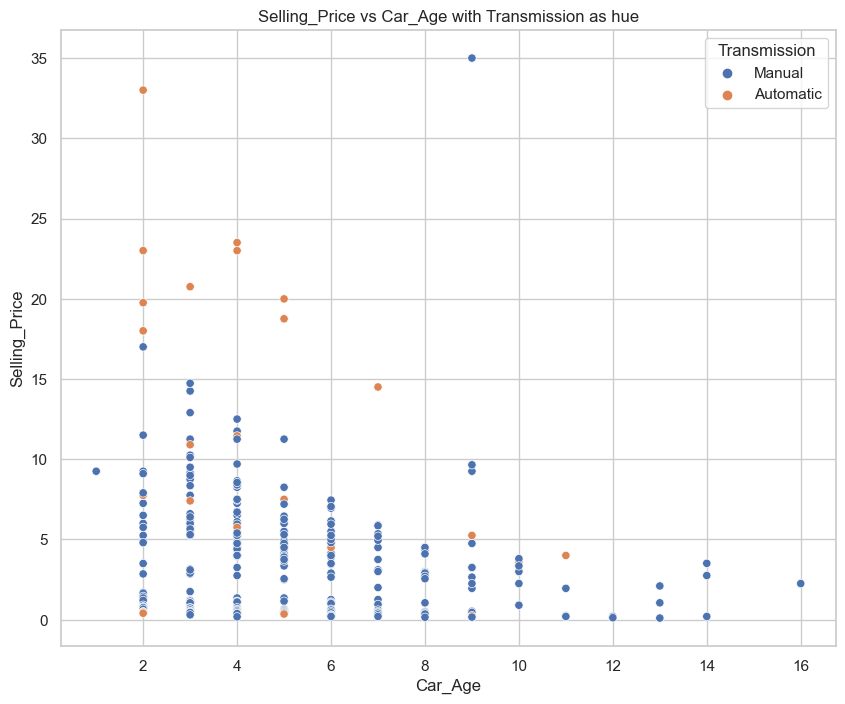

In [23]:
#Multivariate Analysis using Scatter Plot to determine how much selling price changes in response to changes in car manufacture date(age) and transmission type
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'Car_Age', y = 'Selling_Price', data = automob, hue = 'Transmission')
plt.title("Selling_Price vs Car_Age with Transmission as hue")
plt.show()

**Observation :**
- *Automobiles of Automatic Type are comparatively newer and have higher selling price as when compared to the Manual ones*

#### Label Encoding : 

In [24]:
for i in cat_cols:
    automob[i] = automob[i].astype('category').cat.codes #using pandas cat.codes to encode categorical data
automob.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000.0,2,0,1,0,5
1,4.75,9.54,43000.0,1,0,1,0,6
2,7.25,9.85,6900.0,2,0,1,0,2
3,2.85,4.15,5200.0,2,0,1,0,8
4,4.60,6.87,42450.0,1,0,1,0,5


- **In Fuel_Type :**
>- CNG is encoded as 0
>- Diesel is encoded as 1
>- Petrol is encoded as 2
- **In Seller_Type :**
>- Dealer is encoded as 0
>- Individual is encoded as 1
- **In Transmission :**
>- Automatic is encoded as 0
>- Manual is encoded as 1

#### Correlation Analysis :

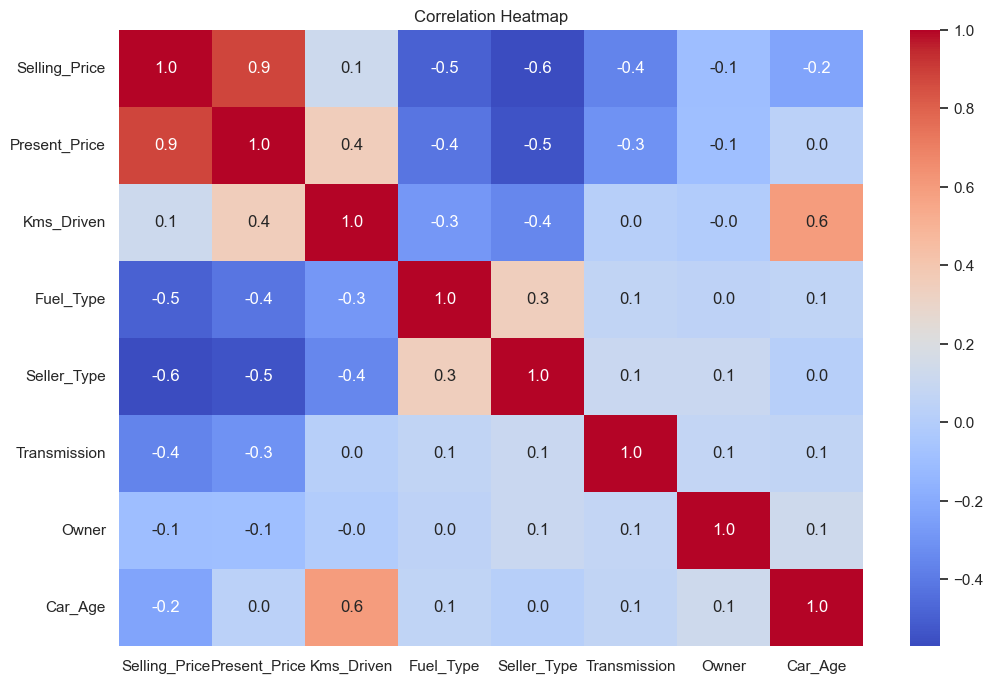

In [25]:
plt.figure(figsize = (12, 8))
sns.heatmap(automob.corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

**Conclusion :**
- *Present Price depicts a very strong relationship with selling price*
- *Kilometers diven depicts a very weak relationship with selling price*
- *Fuel Type depicts a moderate negative relationship with selling price*
- *Seller type depicts a slightly strong negative relationship with selling price*
- *Trasnmission depicts a slightly weak negative relationship with selling price*
- *Owner depicts a very weak negative relationship with selling price*
- *Car age depicts a weak negative relationship with selling price*

### Machine Learning Model :

#### Feature Selection : 

In [26]:
#All features are to be selected except for those that have very weak relationship with the Target variable
x = automob[["Present_Price", "Fuel_Type", "Seller_Type", "Transmission", "Car_Age"]] #Pandas Dataframe
#Selling_Price is the Target(We want to predict the resale price)
y = automob["Selling_Price"] #Pandas series
print(f'{x.shape}\n{y.shape}')

(286, 5)
(286,)


#### Splitting Train & Test Data :

In [27]:
#The test_size parameter determines the split rate of test and train(0.25 means 25% of the data is reserverd for testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10) #random_state ensures consistency 
print(f'{x_train.shape}\n{x_test.shape}\n{y_train.shape}\n{y_test.shape}')

(214, 5)
(72, 5)
(214,)
(72,)


*The Dataframe was correctly splitted into Train and Test Data*

#### Training Machine Learning Models :

In [28]:
#Linear Regression Model
model1 = LinearRegression() #Instantiating a Linear Regression model from scikit-learn
model1.fit(x_train, y_train) #Fit the linear regression model to the training data 
y_pred1 = model1.predict(x_test) #Making predictions on unknown data

In [29]:
#Support Vector Regression Model
model2 = SVR() #Instantiating a Support Vector Regression model from scikit-learn
model2.fit(x_train, y_train) #Fit the Support Vector regression model to the training data 
y_pred2 = model2.predict(x_test) #Making predictions on unknown data

In [30]:
#Decision Tree Regression Model
model3 = DecisionTreeRegressor() #Instantiating a Decision Tree Regression model from scikit-learn
model3.fit(x_train, y_train) #Fit the Decision Tree regression model to the training data 
y_pred3 = model3.predict(x_test) #Making predictions on unknown data

In [31]:
#Random Forest Regression Model
model4 = RandomForestRegressor() #Instantiating a Random Forest Regression model from scikit-learn
model4.fit(x_train, y_train) #Fit the regression model to the training data 
y_pred4 = model4.predict(x_test) #Making predictions on unknown data

#### Testing Accuracy Score for each Model : 

In [32]:

def regression_metrics(model, y_test, y_pred): #Creating a function so it can be used each time
    print("\t\t", model)
    print("R2 score :", r2_score(y_test,y_pred))
    #mean absolute difference between actual and predicted values(+ve and -ve values are not accounted for)
    print("Mean absolute error :", mean_absolute_error(y_test,y_pred))
    #mean squared difference between actual and predicted values(+ve and -ve values are accounted for)
    print("Mean squared error :", mean_squared_error(y_test,y_pred))
    #RMSE accounts for the +ve and -ve values and shows a more interpretable result
    print("Root Mean squared error :", mean_squared_error(y_test,y_pred, squared=False))

In [33]:
#Linear Regression Model
regression_metrics("Linear Regression Model", y_test, y_pred1)

		 Linear Regression Model
R2 score : 0.8745952074743217
Mean absolute error : 1.1879674491372443
Mean squared error : 2.2640266859738016
Root Mean squared error : 1.5046682976569292


In [34]:
#Standard Vector Regression Model
regression_metrics("Standard Vector Regression Model", y_test, y_pred2)

		 Standard Vector Regression Model
R2 score : 0.7918881560272073
Mean absolute error : 0.8499668928088151
Mean squared error : 3.7571990586016906
Root Mean squared error : 1.9383495707951366


In [35]:
#Decision Tree Regression Model
regression_metrics("Decision Tree Regression Model", y_test, y_pred3)

		 Decision Tree Regression Model
R2 score : 0.9136141102252404
Mean absolute error : 0.6988425925925926
Mean squared error : 1.5595891975308644
Root Mean squared error : 1.2488351362493226


In [36]:
#Random Forest Regression Model
regression_metrics("Random Forest Regression Model", y_test, y_pred4)

		 Random Forest Regression Model
R2 score : 0.9726092965792129
Mean absolute error : 0.4841179493847204
Mean squared error : 0.4945048928617121
Root Mean squared error : 0.7032104186242636


### Conclusion :

- *Random Forest Regression Model has the highest accuracy of the 4 models followed by Decision Tree Regression Model*
- *Standard Vector Regression Model has the least accuracy of the 4 models*

**So we use the Random Forest Regression Model for Resale Predictions**

### Predicting Prices with new Data:

In [37]:
def enter_data(present_year):
    rn = int(input("Enter the number of rows you want to predict: "))
    ry = datetime.now().year
    pp, ft, st, tr, ca = [], [], [], [], []
    for i in range(rn):
        pp.append(float(input("Enter the present ex-showroom price of the automobile: ")))
        ft.append(int(input("Enter the fuel type of the automobile - 0 for CNG, 1 for Diesel, 2 for Petrol: ")))
        st.append(int(input("Enter the type of seller for the automobile - 0 for Dealer, 1 for Individual: ")))
        tr.append(int(input("Enter the transmission type of the automobile - 0 for Automatic, 1 for Manual: ")))
        ca.append(int(input("Enter the year in which the automobile was purchased: ")))        
    ca = [ry - i for i in ca]
    new_data = {"Present_Price": pp, "Fuel_Type": ft, "Seller_Type": st, "Transmission": tr, "Car_Age": ca}
    new_data_df = pd.DataFrame(new_data)
    return new_data_df, ry

In [39]:
# Predicting resale price using Random Forest Regression Model
new_data_df, ry = enter_data(present_year)
new_pred = model4.predict(new_data_df)
new_pred = [str(round(i,2)) for i in new_pred]
i = 1
for k in new_pred:
    print(f"The predicted resale price of automobile {i} in the year {ry} is: {k}")
    i += 1

Enter the number of rows you want to predict: 2
Enter the present ex-showroom price of the automobile: 12.5
Enter the fuel type of the automobile - 0 for CNG, 1 for Diesel, 2 for Petrol: 1
Enter the type of seller for the automobile - 0 for Dealer, 1 for Individual: 0
Enter the transmission type of the automobile - 0 for Automatic, 1 for Manual: 1
Enter the year in which the automobile was purchased: 2016
Enter the present ex-showroom price of the automobile: 20.6
Enter the fuel type of the automobile - 0 for CNG, 1 for Diesel, 2 for Petrol: 2
Enter the type of seller for the automobile - 0 for Dealer, 1 for Individual: 0
Enter the transmission type of the automobile - 0 for Automatic, 1 for Manual: 0
Enter the year in which the automobile was purchased: 2017
The predicted resale price of automobile 1 in the year 2024 is: 6.27
The predicted resale price of automobile 2 in the year 2024 is: 8.79
